In [4]:
import pandas as pd

asthma_df = pd.read_csv('asthma.csv')
bronchi_df = pd.read_csv('bronchi.csv')
copd_df = pd.read_csv('copd.csv')

combined_df = pd.merge(asthma_df, bronchi_df, on=['pubchem_CID', 'IUPAC Name'], how='inner')
combined_df = pd.merge(combined_df, copd_df, on=['pubchem_CID', 'IUPAC Name'], how='inner')

asthma_values = combined_df.iloc[:, 2:55]   
bronchi_values = combined_df.iloc[:, 55:90] 
copd_values = combined_df.iloc[:, 90:]     

all_values = pd.concat([asthma_values, bronchi_values, copd_values], axis=1)

final_df = pd.concat([combined_df[['pubchem_CID', 'IUPAC Name']], all_values], axis=1)

value_columns = [str(i) for i in range(1, 122)]
final_df.columns = ['pubchem_CID', 'IUPAC Name'] + value_columns

final_df.to_csv('combined.csv', index=False)

In [5]:
import pandas as pd
df = pd.read_csv('combinedcopy.csv')

df_transposed = df.T
output_file = 'transposed_file.csv'
df_transposed.to_csv(output_file, index=False)

#print(f"CSV file successfully rotated and saved as {output_file}.")

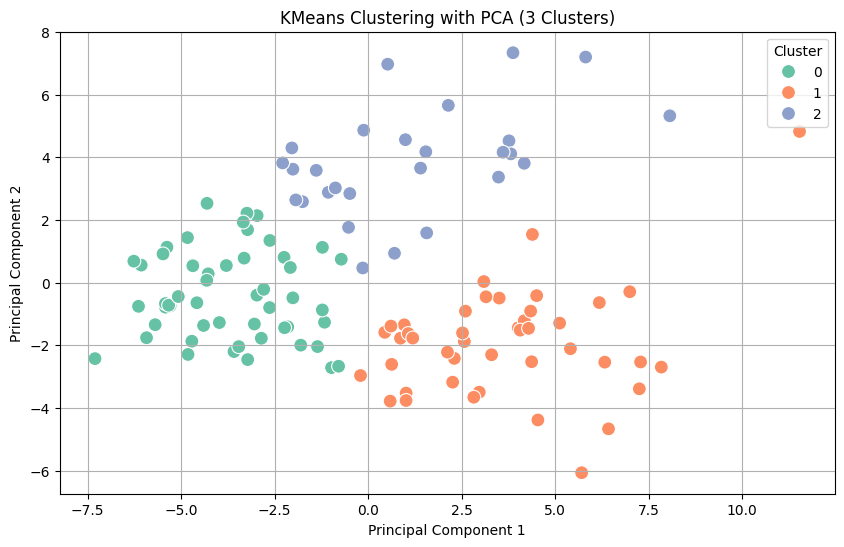

Cluster Counts:
Cluster
0    51
1    43
2    27
Name: count, dtype: int64


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

data = pd.read_csv('transposed_file.csv')
#print(data.isnull().sum())
data.fillna(data.mean(), inplace=True)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

pca = PCA(n_components=2)  
pca_result = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(pca_df)
pca_df['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=100)
plt.title('KMeans Clustering with PCA (3 Clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid()
plt.show()

cluster_counts = pca_df['Cluster'].value_counts()
print("Cluster Counts:")
print(cluster_counts)


In [8]:
# import pandas as pd

# data = [
#     ("2-(4-methylcyclohex-3-en-1-yl)propan-2-ol", 17100),
#     ("1-[(1R,7R)-4-methylidene-7-propan-2-yl-1,2,3,3a,5,6,7,7a-octahydroinden-1-yl]ethanone", 6429350),
#     ("5-octyloxolan-2-one", 16821),
#     ("2,3,3-trimethylpenta-1,4-diene", 136569),
#     ("2,6-ditert-butyl-4-hydroxy-4-methylcyclohexa-2,5-dien-1-one", 146102),
#     ("N-propylhexan-1-amine", 29996),
#     ("2-ethylhexan-1-ol", 7720),
#     ("2-but-3-enoxycarbonylbenzoic acid", 13596727),
#     ("2-[(2,4,4,6,6,8,8-heptamethyl-1,3,5,7,2,4,6,8-tetraoxatetrasilocan-2-yl)oxy]-2,4,4,6,6,8,8,10,10-nonamethyl-1,3,5,7,9,2,4,6,8,10-pentaoxapentasilecane", 551986),
#     ("[2,2,4-trimethyl-3-(2-methylpropanoyloxy)pentyl] 2-methylpropanoate", 23284),
#     ("1-(2,4-dimethylphenyl)-2,4-dimethylbenzene", 520958),
#     ("(E)-3-(2,4-dimethoxyphenyl)-1-(2-hydroxyphenyl)prop-2-en-1-one", 6041429),
#     ("bis[[(3-ethylphenoxy)-dimethylsilyl]oxy]-dimethylsilane", 91742720),
#     ("bis(2-ethylhexyl) (E)-but-2-enedioate", 5370325),
#     ("2-(hydroxymethyl)-2-methylpyrrolidine-1-carbaldehyde", 574439),
#     ("2-benzyl-1-morpholin-4-yl-3-phenylpropan-2-ol", 567717),
#     ("(E)-3-(2,2,6-trimethyl-7-oxabicyclo[4.1.0]heptan-1-yl)prop-2-enal", 5370158),
#     ("2-ethylhexyl 3-(4-methoxyphenyl)prop-2-enoate", 21630),
#     ("3-ethyl-3-[4-(hydroxyamino)phenyl]piperidine-2,6-dione", 137353),
#     ("(5-oxooxolan-2-yl)methyl 3,5-dinitrobenzoate", 558880),
#     ("3,5-ditert-butyl-4-hydroxybenzaldehyde", 73219),
#     ("3,6,6-trimethylcyclohex-2-en-1-one", 141033),
#     ("(4-trimethylsilyloxybenzoyl) 4-trimethylsilyloxybenzoate", 91731726),
#     ("5H-cyclopenta[b]pyridine", 575987),
#     ("1-phenylethanone", 7410),
#     ("1-O-butyl 6-O-propan-2-yl hexanedioate", 91713521),
#     ("2-hydroxy-2-phenylpropanoic acid", 1303),
#     ("azulene", 9231),
#     ("benzaldehyde", 240),
#     ("1,3,5-triethylbenzene", 7602),
#     ("1-ethyl-4-methylbenzene", 12160),
#     ("2-phenylacetaldehyde", 998),
#     ("2-phenylpropan-2-ol", 12053),
#     ("1-phenylpropan-1-ol", 7147),
#     ("(1R)-1-phenylethanol", 637516),
#     ("2-methylbutyl benzoate", 103653),
#     ("ethyl 4-ethoxybenzoate", 90232),
#     ("diphenylmethanone", 3102),
#     ("1,3-benzothiazole", 7222),
#     ("phenylmethanol", 244),
#     ("bis(2-ethylhexyl) benzene-1,2-dicarboxylate", 8343),
#     ("bis(2-ethylhexyl) carbonate", 85781),
#     ("cyclododecane", 9268),
#     ("2,2,4,4,6,6,8,8,10,10,12,12,14,14-tetradecamethyl-1,3,5,7,9,11,13-heptaoxa-2,4,6,8,10,12,14-heptasilacyclotetradecane", 7874),
#     ("2,2,4,4,6,6,8,8,10,10,12,12,14,14,16,16,18,18-octadecamethyl-1,3,5,7,9,11,13,15,17-nonaoxa-2,4,6,8,10,12,14,16,18-nonasilacyclclooctadecane", 11172),
#     ("2,2,4,4,6,6,8,8,10,10,12,12,14,14,16,16-hexadecamethyl-1,3,5,7,9,11,13,15-octaoxa-2,4,6,8,10,12,14,16-octasilacyclohexadecane", 11170),
#     ("2,2,4,4,6,6,8,8-octamethyl-1,3,5,7,2,4,6,8-tetraoxatetrasilocane", 11169),
#     ("2,2,4,4,6,6-hexamethyl-1,3,5,2,4,6-trioxatrisilinane", 10914),
#     ("decane", 15600),
#     ("4-methyldecane", 17835),
#     ("4-methyldecane", 17835),
#     ("dodecanal", 8194),
#     ("dodecyl prop-2-enoate", 75084),
#     ("2-butoxyethanol", 8133),
#     ("2-phenoxyethanol", 31236),
#     ("2-phenoxyethyl acetate", 22568),
#     ("1-(3-acetylphenyl)ethanone", 23229),
#     ("ethylbenzene", 7500),
#     ("1,3,3-trimethyl-2-oxabicyclo[2.2.2]octane", 2758),
#     ("2-pentylfuran", 19602),
#     ("(2S)-5-amino-2-(methylamino)-5-oxopentanoic acid", 160669),
#     ("2,6,10,15-tetramethylheptadecane", 41209),
#     ("hexadecane", 11006),
#     ("3,7-dimethyloct-7-en-3-ol", 557859),
#     ("methyl 2-hydroxybenzoate", 4133),
#     ("N-methyl-N-[2-(methylamino)ethyl]benzamide", 13544681),
#     ("5-ethyl-2-methyloctane", 537332),
#     ("4-(2,4,4-trimethylpentan-2-yl)phenol", 8814),
#     ("trimethyl-[2-trimethylsilyloxy-1-(4-trimethylsilyloxyphenyl)ethoxy]silane", 622436),
#     ("trimethyl-[2-trimethylsilyloxy-1-(4-trimethylsilyloxyphenyl)ethoxy]silane", 622436),
#     ("1,2-dimethoxy-4-(2-nitrophenyl)benzene", 2709),
#     ("2-methoxy-5-(methylthio)phenylacetic acid", 40356),
#     ("3,5-dimethoxy-4-(methylthio)phenylmethanol", 26761),
#     ("3,5-dimethoxy-4-(methylthio)phenylmethanol", 26761),
#     ("1,3-bis(4-methylphenyl)-2-propyl-1-propene", 20469)
# ]

# df = pd.DataFrame(data, columns=["IUPAC Name", "PubChem CID"])

# df.insert(0, "ID", range(len(df)))

# df.to_csv("iupac_pubchem_74.csv", index=False)

In [9]:
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances

iupac_df = pd.read_csv('iupac_pubchem_74.csv')

pca_result = pca_df[['PC1', 'PC2']].values
clusters = pca_df['Cluster'].values

optimal_clusters = 3

centroids = np.array([pca_result[clusters == i].mean(axis=0) for i in range(optimal_clusters)])

distances_to_centroids = pairwise_distances(pca_result, centroids)

farthest_points = []
for i in range(optimal_clusters):
    cluster_points = np.where(clusters == i)[0]
    
    other_centroids_distances = np.delete(distances_to_centroids[cluster_points], i, axis=1)
    
    farthest_point_idx = cluster_points[np.argmax(other_centroids_distances.max(axis=1))]
    farthest_points.append(farthest_point_idx)

print("Cluster-wise Farthest Points:")
for i, farthest_point in enumerate(farthest_points):
    print(f"Cluster {i} - Farthest Point Index: {farthest_point}")
    print(f"Cluster {i} - IUPAC Name: {iupac_df.loc[farthest_point, 'IUPAC Name']}, PubChem CID: {iupac_df.loc[farthest_point, 'PubChem CID']}")

farthest_point_columns = [pca_df.columns.get_loc('PC1') for point in farthest_points]

Cluster-wise Farthest Points:
Cluster 0 - Farthest Point Index: 30
Cluster 0 - IUPAC Name: 1-ethyl-4-methylbenzene, PubChem CID: 12160
Cluster 1 - Farthest Point Index: 61
Cluster 1 - IUPAC Name: 2,6,10,15-tetramethylheptadecane, PubChem CID: 41209
Cluster 2 - Farthest Point Index: 65
Cluster 2 - IUPAC Name: N-methyl-N-[2-(methylamino)ethyl]benzamide, PubChem CID: 13544681
